In [23]:
import turtle
import numpy as np
from PIL import Image, ImageDraw

In [102]:
def drawLineSegments(segments, img_size=300, draw_size=250):
    minC = (img_size - draw_size)/2
    
    span = np.max(segments) - np.min(segments)
    ratio = draw_size/span
    shift = -np.min(segments)
    
    q = lambda v : (v + shift) * ratio + minC
    
    img = Image.new('RGB', (img_size, img_size), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    
    for segment in segments:
        draw.line((q(segment[0][0]), q(segment[0][1]), q(segment[1][0]), q(segment[1][1])), fill=256)
        
    return img

In [103]:
def getSegmentsFromFile(file_path):
    file = open(file_path, 'r')
    lines = file.readlines()
    
    n, ratio = lines[0].split()
    n = int(n)
   
    parseLine = lambda ln : [[float(ln.split()[0]), float(ln.split()[1])],\
                             [float(ln.split()[2]), float(ln.split()[3])]]
    segments = [parseLine(ln) for ln in lines[1:]]
    
    print('Spanner ratio:', ratio)
    return segments

Spanner ratio: 1.41421


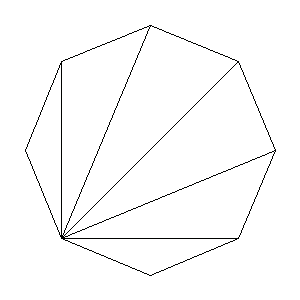

In [104]:
drawLineSegments(getSegmentsFromFile('octagon.out'))

Spanner ratio: 1.36603


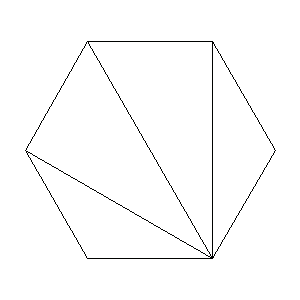

In [106]:
drawLineSegments(getSegmentsFromFile('hexagon.out'))

Spanner ratio: 1.38367


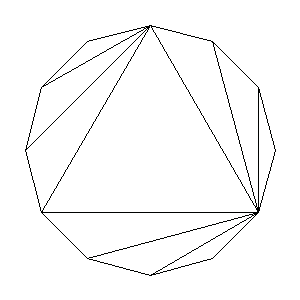

In [108]:
drawLineSegments(getSegmentsFromFile('dodecagon.out'))